In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sb
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [36]:
Datos = pd.read_csv('Datos_Exp1.csv')
Amarillo = Datos[Datos['Color'] == 'Verde']

In [37]:
Amarillo

,Color,Corriente,Voltaje
32,Verde,9.0,24.5
33,Verde,8.5,24.8
34,Verde,8.0,25.0
35,Verde,7.5,26.0
36,Verde,7.0,27.0
37,Verde,6.5,26.3


In [38]:
corr_test = pearsonr(x = Amarillo['Corriente'], y =  Amarillo['Voltaje'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.9037234444336213
P-value:  0.013457560599314185


In [39]:
# División de los datos en train y test
# ==============================================================================
X = Amarillo[['Corriente']]
y = Amarillo['Voltaje']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [40]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [32.48571429]
Coeficiente: [('Corriente', -0.8714285714285717)]
Coeficiente de determinación R^2: 0.7895778643407574


/home/checho/.local/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [41]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[25.51428571]
 [25.07857143]]

El error (rmse) de test es: 0.41357697997754417


In [42]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     7.909
Date:                Mon, 06 Feb 2023   Prob (F-statistic):              0.107
Time:                        18:42:04   Log-Likelihood:                -2.1086
No. Observations:                   4   AIC:                             8.217
Df Residuals:                       2   BIC:                             6.990
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.4857      2.342     13.871      0.0

/home/checho/.local/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [43]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[22.40871621, 42.56271236],
       [-2.20469845,  0.46184131]])

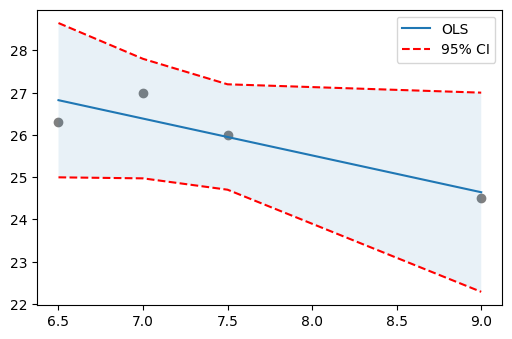

In [44]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [45]:
X = Amarillo['Corriente'].to_numpy()
Y = Amarillo['Voltaje'].to_numpy()
np.polyfit(X,Y,deg=1,cov=True,full=False)

(array([-0.94857143, 32.95142857]),
 array([[ 0.05048163, -0.39123265],
        [-0.39123265,  3.06886259]]))